In [1]:
import keras 
import tensorflow as tf
from keras.datasets import mnist #cargo los datos del mnist
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from numpy import genfromtxt
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.


In [2]:
#ok funciona bien
#funcion que hace reshape de las imagenes
#sin agregar el bias
def reshapeImages(x,y):
    im_shape = x.shape[1:]
    x = np.reshape(x,(x.shape[0],np.prod(im_shape)))
    return x,y

In [3]:
#definicion de constantes
n_clases = 10 #cantidad de clases
n_capa1 = 100 #cantidad de neuronas capa 1
n_capa2 = n_clases #cantidad de neuronas capa 2 (= cantidad de clases)
#importamos los datos de training y testing
(x_train,y_train),(x_test,y_test) = mnist.load_data() 
#preprocesado de los datos
mean = np.mean(x_train,axis=0)
#sigma = np.std(x_train,axis=0) algunos elementos son = 0, cambio por 255
sigma = 255.0
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
#reshaping y flatten
x_train,y_train = reshapeImages(x_train,y_train)
x_test,y_test = reshapeImages(x_test,y_test)
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
n_dim = x_train.shape[1] #dimension de entrada
epocas = 100 #cantidad de epocas

In [5]:
#red neuronal solo con capas densas

In [5]:
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1, activation='relu', use_bias=True, 
                           kernel_regularizer=keras.regularizers.l2(1e-5))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='softmax',use_bias=True,
                           kernel_regularizer=keras.regularizers.l2(1e-5))(l1)
model = keras.Model(inputs=x, outputs=l2)
optimizer = keras.optimizers.SGD(learning_rate=5e-3)
model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
#plot_model(model,to_file='ej8_1_cg.pdf',show_shapes = True,rankdir='LR')
#model.summary()
history = model.fit(x_train, yy_train, epochs=epocas, validation_data=(x_test, yy_test),batch_size=100, verbose=2)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


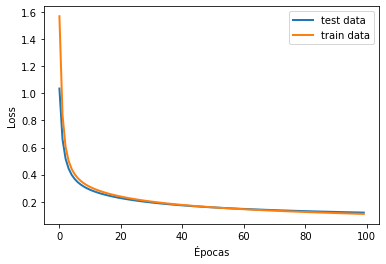

In [7]:
plt.plot(history.history['val_loss'],label='test data',linewidth=2)
plt.plot(history.history['loss'],label='train data',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej8_1_loss.pdf')
#files.download( 'ej8_1_loss.pdf' ) 

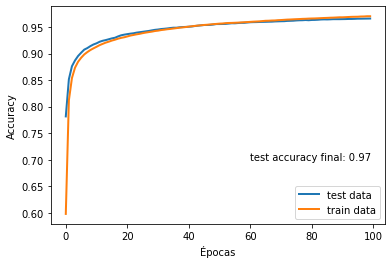

In [9]:
plt.plot(history.history['val_acc'],label='test data',linewidth=2)
plt.plot(history.history['acc'],label='train data',linewidth=2)
plt.legend()
plt.text(60,0.7,'test accuracy final: '+str(round(history.history['val_acc'][-1],2)))
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej8_1_acc.pdf')
#files.download( 'ej8_1_acc.pdf' ) 

In [ ]:
#red neuronal con capas convolucionales

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() 
train_shape = x_train.shape
test_shape = x_test.shape
#preprocesado de los datos
mean = np.mean(x_train,axis=0)
sigma = 255.0
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
#reshaping y flatten
x_train,y_train = reshapeImages(x_train,y_train)
x_test,y_test = reshapeImages(x_test,y_test)
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
n_dim = x_train.shape[1] #dimension de entrada
epocas = 100 #cantidad de epocas
n_categorias = 10

In [9]:
x_train = x_train.reshape(train_shape)
x_test = x_test.reshape(test_shape)
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]
epocas = 100
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,(3, 3), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['acc'])
#plot_model(model,to_file='ej8_2_cg.pdf',show_shapes = True,rankdir='LR')
#model.summary()
history = model.fit(x_train, yy_train, epochs=epocas, validation_data=(x_test, yy_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.4193 - acc: 0.8897 - val_loss: 0.1750 - val_acc: 0.9512
Epoch 2/100
 - 3s - loss: 0.1635 - acc: 0.9535 - val_loss: 0.1120 - val_acc: 0.9661
Epoch 3/100
 - 3s - loss: 0.1238 - acc: 0.9633 - val_loss: 0.0896 - val_acc: 0.9715
Epoch 4/100
 - 3s - loss: 0.1065 - acc: 0.9690 - val_loss: 0.0784 - val_acc: 0.9763
Epoch 5/100
 - 3s - loss: 0.0940 - acc: 0.9721 - val_loss: 0.0702 - val_acc: 0.9782
Epoch 6/100
 - 3s - loss: 0.0849 - acc: 0.9745 - val_loss: 0.0646 - val_acc: 0.9798
Epoch 7/100
 - 3s - loss: 0.0784 - acc: 0.9767 - val_loss: 0.0630 - val_acc: 0.9800
Epoch 8/100
 - 3s - loss: 0.0764 - acc: 0.9761 - val_loss: 0.0606 - val_acc: 0.9814
Epoch 9/100
 - 3s - loss: 0.0730 - acc: 0.9776 - val_loss: 0.0595 - val_acc: 0.9819
Epoch 10/100
 - 3s - loss: 0.0684 - acc: 0.9788 - val_loss: 0.0567 - val_acc: 0.9815
Epoch 11/100
 - 3s - loss: 0.0654 - acc: 0.9797 - val_loss: 0.0577 - val_acc: 0.9814
Epoch 12/100
 - 3s - los

Epoch 97/100
 - 3s - loss: 0.0276 - acc: 0.9903 - val_loss: 0.0500 - val_acc: 0.9863
Epoch 98/100
 - 3s - loss: 0.0265 - acc: 0.9911 - val_loss: 0.0511 - val_acc: 0.9863
Epoch 99/100
 - 3s - loss: 0.0269 - acc: 0.9907 - val_loss: 0.0513 - val_acc: 0.9862
Epoch 100/100
 - 3s - loss: 0.0250 - acc: 0.9917 - val_loss: 0.0527 - val_acc: 0.9862


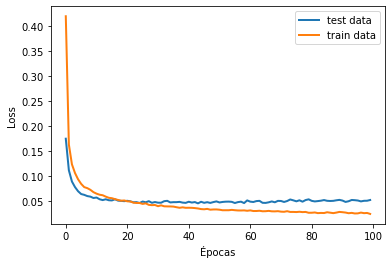

In [13]:
plt.plot(history.history['val_loss'],label='test data',linewidth=2)
plt.plot(history.history['loss'],label='train data',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej8_2_loss.pdf')
#files.download( 'ej8_2_loss.pdf' ) 

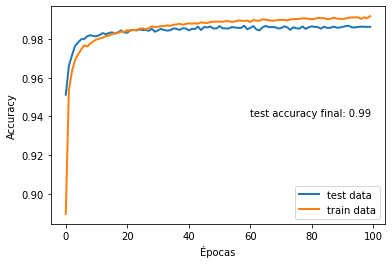

In [14]:
plt.plot(history.history['val_acc'],label='test data',linewidth=2)
plt.plot(history.history['acc'],label='train data',linewidth=2)
plt.legend()
plt.text(60,0.94,'test accuracy final: '+str(round(history.history['val_acc'][-1],2)))
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej8_2_acc.pdf')
#files.download( 'ej8_2_acc.pdf' ) 